In [1]:
# -*- coding:utf-8 -*-
# __author__ : Xiaoyan Liu, ID number: 201931051095
# __date__: 2022/11/19 20:00

import math
from math import pi
import matplotlib.pyplot as plt
import numpy as np
import random

# 生成100个随机数

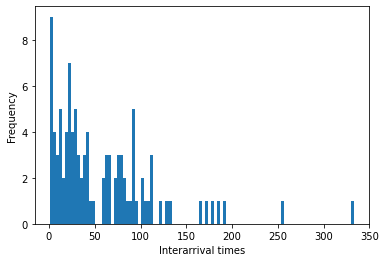

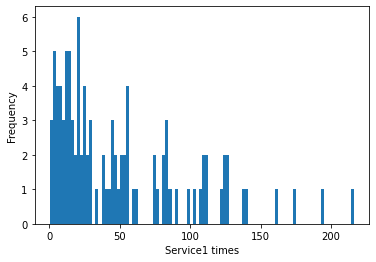

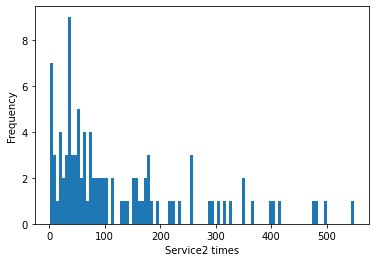

In [2]:
# Interarrival time for customers: 60 seconds
# Alternative 1: 1 server, 54 seconds
# Alternative 2: 2 servers, 108 seconds

Mean_interarrival = 60
Mean_service1 = 54
Mean_service2 = 108

Ilist = []
S1list = []
S2list = []

for i in range(100):
        IU = random.random()
        I = - Mean_interarrival * math.log(IU)

        SU1 = random.random()
        S1 = - Mean_service1 * math.log(SU1)

        SU2 = random.random()
        S2 = - Mean_service2 * math.log(SU2)

        Ilist.append(I)
        S1list.append(S1)
        S2list.append(S2)

plt.hist(Ilist, bins=100)
plt.xlabel("Interarrival times")
plt.ylabel("Frequency")
plt.show()

plt.hist(S1list, bins=100)
plt.xlabel("Service1 times")
plt.ylabel("Frequency")
plt.show()

plt.hist(S2list, bins=100)
plt.xlabel("Service2 times")
plt.ylabel("Frequency")
plt.show()

# M/M/1 & M/M/2

In [3]:
# 第i位顾客到达的时间(绝对)：T(i)=I(0)+...+I(i-1)+I(i)
# 第i位顾客在队列中的时间(相对)：D(i)
# 第i位顾客在系统中的时间(相对)：X(i)=D(i)+S(i)  performance measure: the average time in system
# 第i位顾客离去的时间(绝对)：L(i)=T(i)+X(i)

T1 = 0
L1 = 0

T1list = []
D1list = []
X1list = []
L1list = []
T2list = []
D2list = []
X2list = []
L2list = []


# 顾客按顺序依次考虑

# M/M/1队列
n=0
while n <= 99:
    T1= T1+Ilist[n]
    
    if T1 <= L1:
        D1 = L1 - T1
        X1 = D1 + S1list[n]
        L1 = T1 + X1
        
    if T1 > L1:
        D1 = 0
        X1 = D1 + S1list[n]
        L1 = T1 + X1

    T1list.append(T1)
    D1list.append(D1)
    X1list.append(X1)
    L1list.append(L1)
    n = n+1

# M/M/2队列
# 第一位顾客
T2 = Ilist[0]
D2 = 0
X2 = S2list[0]
L2 = T2 + S2list[0]
T2list.append(T2)
D2list.append(D2)
X2list.append(X2)
L2list.append(L2)
# 第二位顾客
T2 = Ilist[1]
D2 = 0
X2 = S2list[1]
L2 = T2 + S2list[1]
T2list.append(T2)
D2list.append(D2)
X2list.append(X2)
L2list.append(L2)

n = 2
while n <= 99:
    T2 = T2 + Ilist[n]
    
    if T2 <= L2list[n-1]:
        if  T2 <= L2list[n-2]:
            if L2list[n-1] <= L2list[n-2]:
                D2 = L2list[n-1] - T2 
                X2 = D2 + S2list[n]
                L2 = T2 + X2
            if L2list[n-1] > L2list[n-2]:
                D2 = L2list[n-2] - T2 
                X2 = D2 + S2list[n]
                L2 = T2 + X2                
        if T2 > L2list[n-2]:
            D2 = 0
            X2 = D2 + S2list[n]
            L2 = T2 + X2
        
    if T2 > L2:
        D2 = 0
        X2 = D2 + S2list[n]
        L2 = T2 + X2

    T2list.append(T2)
    D2list.append(D2)
    X2list.append(X2)
    L2list.append(L2)
    n = n+1


# 运行10000次 

In [4]:
run = 10000
P1 = []
P2 = []

for m in range(run):
    
    # 生成100个随机顾客
    # Interarrival time for customers: 60 seconds
    # Alternative 1: 1 server, 54 seconds
    # Alternative 2: 2 servers, 108 seconds
    
    Mean_interarrival = 60
    Mean_service1 = 54
    Mean_service2 = 108

    Ilist = []
    S1list = []
    S2list = []

    for i in range(100):
        IU = random.random()
        I = - Mean_interarrival * math.log(IU)

        SU1 = random.random()
        S1 = - Mean_service1 * math.log(SU1)

        SU2 = random.random()
        S2 = - Mean_service2 * math.log(SU2)
        
        Ilist.append(I)
        S1list.append(S1)
        S2list.append(S2)

    # plt.hist(Ilist, bins=100)
    # plt.xlabel("Interarrival times")
    # plt.ylabel("Frequency")
    # plt.show()

    # plt.hist(S1list, bins=100)
    # plt.xlabel("Service1 times")
    # plt.ylabel("Frequency")
    # plt.show()

    # plt.hist(S2list, bins=100)
    # plt.xlabel("Service2 times")
    # plt.ylabel("Frequency")
    # plt.show()

    
    # 让每次 M/M/1 & M/M/2 两个系统的顾客都一样，以保证结果具有可比性
    # 第i位顾客到达的时间(绝对)：T(i)=I(0)+...+I(i-1)+I(i)
    # 第i位顾客在队列中的时间(相对)：D(i)
    # 第i位顾客在系统中的时间(相对)：X(i)=D(i)+S(i)
    # 第i位顾客离去的时间(绝对)：L(i)=T(i)+X(i)
    # performance measure: the average time in system
    
    T1 = 0
    L1 = 0

    T1list = []
    D1list = []
    X1list = []
    L1list = []
    T2list = []
    D2list = []
    X2list = []
    L2list = []

    # M/M/1队列
    n = 0
    while n <= 99:
        T1 = T1 + Ilist[n]

        if T1 <= L1:
            D1 = L1 - T1
            X1 = D1 + S1list[n]
            L1 = T1 + X1

        if T1 > L1:
            D1 = 0
            X1 = D1 + S1list[n]
            L1 = T1 + X1

        T1list.append(T1)
        D1list.append(D1)
        X1list.append(X1)
        L1list.append(L1)
        n = n + 1


    # M/M/2队列
    # 第一位顾客
    T2 = Ilist[0]
    D2 = 0
    X2 = S2list[0]
    L2 = T2 + S2list[0]
    T2list.append(T2)
    D2list.append(D2)
    X2list.append(X2)
    L2list.append(L2)
    # 第二位顾客
    T2 = Ilist[1]
    D2 = 0
    X2 = S2list[1]
    L2 = T2 + S2list[1]
    T2list.append(T2)
    D2list.append(D2)
    X2list.append(X2)
    L2list.append(L2)

    n = 2
    while n <= 99:
        T2 = T2 + Ilist[n]
        
        if T2 <= L2list[n-1]:
            if T2 <= L2list[n-2]:
                if L2list[n-1] <= L2list[n-2]:
                    D2 = L2list[n-1] - T2
                    X2 = D2 + S2list[n]
                    L2 = T2 + X2
                if L2list[n-1] > L2list[n-2]:
                    D2 = L2list[n-2] - T2
                    X2 = D2 + S2list[n]
                    L2 = T2 + X2
            if T2 > L2list[n-2]:
                D2 = 0
                X2 = D2 + S2list[n]
                L2 = T2 + X2
        
        if T2 > L2:
            D2 = 0
            X2 = D2 + S2list[n]
            L2 = T2 + X2
        
        T2list.append(T2)
        D2list.append(D2)
        X2list.append(X2)
        L2list.append(L2)
        n = n + 1
        
        
    PX1 = np.mean(X1list)
    P1.append(PX1)
    PX2 = np.mean(X2list)
    P2.append(PX2)

In [5]:
# QA.Construct the 95 confidence level for the average time in system for these two system

MEAN1 = np.mean(P1)
MEAN2 = np.mean(P2)

STD1 = np.std(P1)
STD2 = np.std(P2) 
# np.std求标准差默认除以n,是有偏的，无偏样本标准差加入参数 ddof=1

SE1 = STD1 / 100
SE2 = STD2 / 100

a1 = MEAN1-1.96*SE1
a2 = MEAN2-1.96*SE2
b1 = MEAN1+1.96*SE1
b2 = MEAN2+1.96*SE2

print('The 95 confidence level for the average time in system for these two system is:',str(1.96))

print('The 95 confidence interval for the average time in system for M/M/1:','(',a1,',',b1,')')
print('The 95 confidence interval for the average time in system for M/M/2:','(',a2,',',b2,')')

The 95 confidence level for the average time in system for these two system is: 1.96
The 95 confidence interval for the average time in system for M/M/1: ( 294.5989097600817 , 301.5090296314943 )
The 95 confidence interval for the average time in system for M/M/2: ( 165.30354152388446 , 167.18388143450653 )


In [6]:
# QB.If we want to make sure that the error is within 1 second (with a=0.01), how many more runs do we need to have?

more1 = math.ceil(2.58*STD1*2.58*STD1 -10000)  # 向上取整
more2 = math.ceil(2.58*STD2*2.58*STD1 -10000)

print('M/M/1 needs to have',more1,'more runs')
print('M/M/2 needs to have',more2,'more runs')

M/M/1 needs to have 196842 more runs
M/M/2 needs to have 46285 more runs


In [7]:
# QC.Compare these two systems and identify the best system with a probability of at least 95%

Z = [P1[i] - P2[i] for i in range(len(P1))]
MEANZ = np.mean(Z)
STDZ = np.std(Z,ddof=1)
SEZ = STDZ / 100
az = MEANZ - 1.96*SEZ
bz = MEANZ + 1.96*SEZ

print('the approximate 95 percent confidence interval is','(',az,',',bz,')')

the approximate 95 percent confidence interval is ( 128.40869330009207 , 135.21182313309305 )


In [8]:
STDZ

173.5492304336979

In [9]:
SEZ

1.7354923043369788

In [10]:
Z

[185.255821176505,
 140.96578841816222,
 442.7867604728731,
 22.357233841139532,
 50.14446179554818,
 144.34324529585436,
 84.61820258089728,
 304.5944196336013,
 253.6178618652308,
 124.77779924599326,
 -7.2899821951191655,
 -96.61931991320236,
 62.261749684237714,
 76.85380632452419,
 68.99065743980455,
 33.77364454102107,
 36.35756371762446,
 91.61541390062749,
 82.37653693900592,
 68.44511988303788,
 -25.032907872051936,
 134.97976557186075,
 -154.37837149493416,
 9.613502872525885,
 190.99103160404604,
 980.7784119788603,
 144.46477264970736,
 -91.59504936778114,
 194.04010003526014,
 99.22114142474223,
 -26.393335773114202,
 11.723547518475812,
 -25.216435116975248,
 152.78381109887655,
 46.124709231006904,
 -63.761801816168344,
 52.67052971156241,
 58.00864221974018,
 48.88918398945518,
 -5.002855152403072,
 87.91911688897653,
 56.62788740354412,
 220.9806723414449,
 16.20244177995471,
 143.3100433478989,
 92.88694693738752,
 247.16596068178936,
 313.41296877910423,
 19.35953438

In [ ]:
reset